In [1]:
from collections import defaultdict
import math
import pandas as pd
import re
from datetime import datetime 
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
import pylab

print('numpy: ',np.version.version)
print('pandas: ',pd.__version__)

numpy:  1.17.2
pandas:  1.0.3


AttributeError: module 'os' has no attribute 'cwd'

In [9]:
languages = ['en', 'es', 'eu', 'ca', 'pt', 'gl']
defaultSmoothing = 10e-10
for language in languages:
    exec("%sAlphabets={}" % language)
    exec('%sSize = 0' % language)
    exec('%sModel = np.array([])' % language)
df = pd.read_csv('/Users/Gagandeep/Desktop/Concordia/10 Winter 2020/COMP 472/Assignments/Asg2/OriginalDataSet/training-tweets.txt', encoding='utf-8', error_bad_lines=False, sep='\t', nrows=5000, warn_bad_lines=False)
df.columns = ['TweetID', 'UserID', 'Language', "Tweet"]
_df = df[['Language', 'Tweet']].copy()
train_dict = defaultdict(list)
pattern = re.compile('[a-z]')
for index, row in _df.iterrows():
    sentence = ''
    tweet = row['Tweet']
    tweet = tweet.lower()
    language = row['Language']
    for letter in tweet:
        if pattern.match(letter):
            exec('if \'{let}\' not in {L}Alphabets.keys():\n\
                     {L}Alphabets[letter] = {L}Size\n\
                     {L}Size += 1'.format(let=letter, L=language))
            sentence = sentence + letter
        else:
            sentence = sentence + ' '
            train_dict[row['Language']].append(sentence)

In [10]:
for language in languages:
    exec("{L}Model = np.resize({L}Model, ({L}Size+1))".format(L=language))
    exec('{L}Model = np.add({L}Model, defaultSmoothing)'.format(L=language))

In [11]:
for language, tweets in train_dict.items():
    for tweet in tweets:
        for i in range(len(tweet) - 1):
            first = tweet[i] # get the first character
            if not first.isspace():
                exec('index = %sAlphabets[first]' % language)  # get index of the character from the language dictionary
                exec('%sModel[index] += 1' % language)  # increment that index in the language model

for language in languages:
    exec('{L}Model = np.add({L}Model, defaultSmoothing)'.format(L=language))  # this is where smoothing happens
    exec('{L}Model = np.divide({L}Model, {L}Model.sum(axis=0))'.format(L=language))  # divide all the values by the sum of the row
    exec('{L}Model = np.log10({L}Model)'.format(L=language))

In [ ]:
# print(enModel)

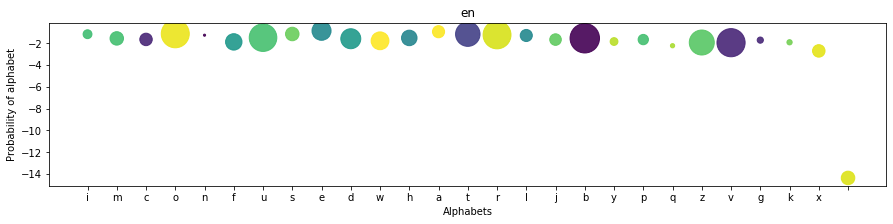

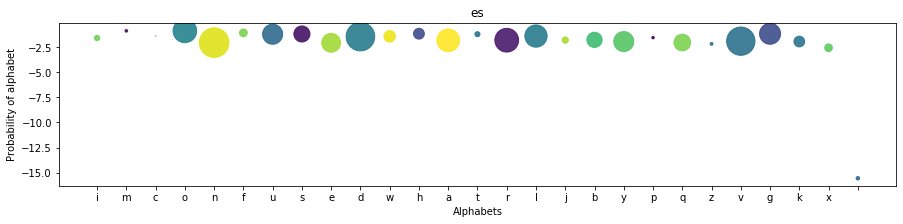

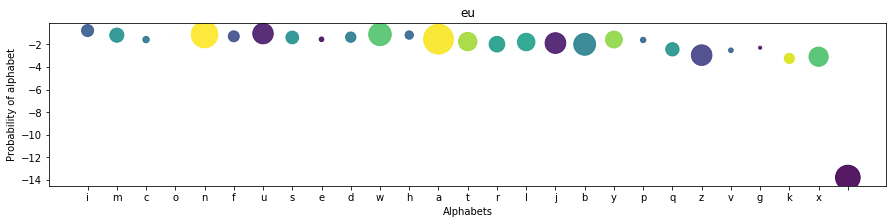

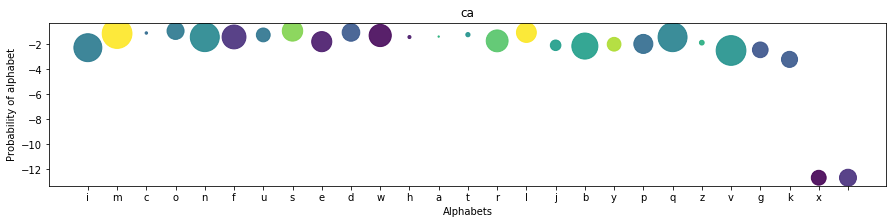

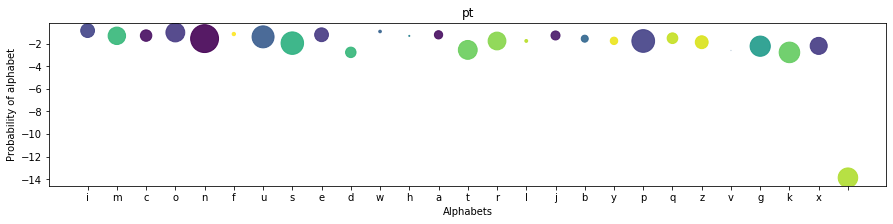

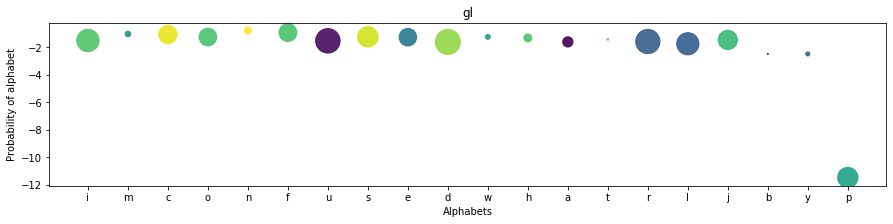

In [12]:
for language in languages:    
    exec ( 'x = np.asarray(list({lang}Alphabets.values()))\n\
x = np.append(x, (x.shape[0]))\n\
y = {lang}Model\n\
fig = plt.figure()\n\
fig.set_size_inches(15, 3)\n\
area = (30 * np.random.rand(x.shape[0]))**2\n\
colors = np.random.rand(x.shape[0])\n\
plt.title(\'{lang}\')\n\
plt.xlabel(\'Alphabets\')\n\
plt.ylabel(\'Probability of alphabet\')\n\
plt.scatter(x, y, s=area, c=colors, alpha=0.9)\n\
plt.xticks(x, list(enAlphabets.keys()))\n\
plt.tick_params(axis=\'x\', which=\'minor\', labelsize=10, width = 5)'.format(lang=language)) 